# 🏡 Toronto Housing EDA

Exploratory Data Analysis of the cleaned Toronto housing dataset.
We'll explore distributions, trends, and relationships between price, category, city, bedrooms, etc.

In [13]:
import pandas as pd 
# Load cleaned dataset
df = pd.read_csv('../data/processed/toronto_cleaned_housingdata.csv')
df.head()

,address,price,details,bedrooms,bathrooms,category,city
0,"218 Golden Trl, Vaughan, ON L6A 5A1",1199000.0,3 bds3 ba- Townhouse for sale,3.0,3.0,Townhouse,Vaughan
1,"24 Sicilia St, Vaughan, ON L4H 1G3",1399999.0,4 bds4 ba- House for sale,4.0,4.0,House,Vaughan
2,"81 Mahogany Forest Dr, Vaughan, ON L6A 0T1",1258800.0,4 bds4 ba- House for sale,4.0,4.0,House,Vaughan
3,"99 Abner Miles Dr, Vaughan, ON L6A 4X4",2299000.0,5 bds6 ba- House for sale,5.0,6.0,House,Vaughan
4,"26 Bruce St #E17, Vaughan, ON L4L 0H4",649999.0,2 bds2 ba- Condo for sale,2.0,2.0,Condo,Vaughan


In [14]:
#base structure of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    3904 non-null   object 
 1   price      3903 non-null   float64
 2   details    3904 non-null   object 
 3   bedrooms   3771 non-null   float64
 4   bathrooms  3779 non-null   float64
 5   category   3904 non-null   object 
 6   city       3904 non-null   object 
dtypes: float64(3), object(4)
memory usage: 213.6+ KB


In [15]:
df['price'].describe()

count    3.903000e+03
mean     1.286274e+06
std      1.378598e+06
min      2.750000e+04
25%      6.999995e+05
50%      9.499990e+05
75%      1.389000e+06
max      4.500000e+07
Name: price, dtype: float64

## 💰 Price Distribution
Visualize how housing prices are distributed.

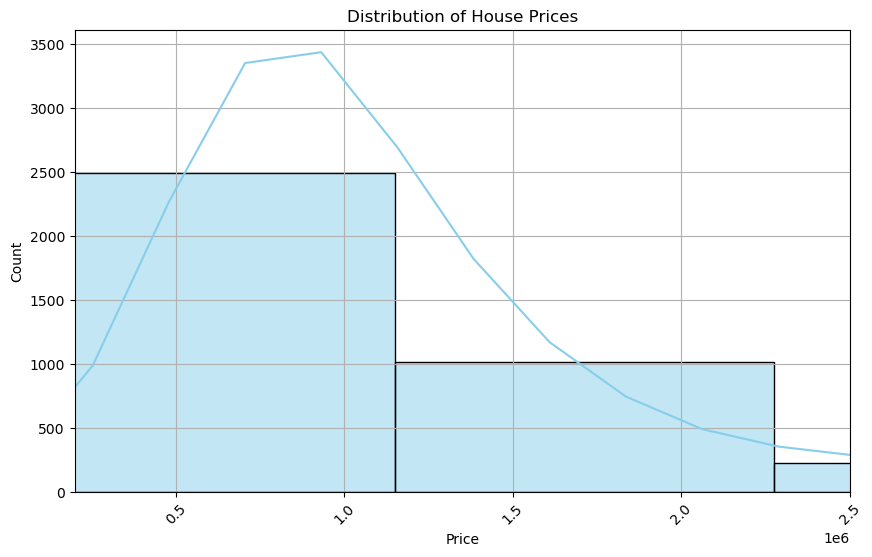

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)


# Limit the x-axis to focus on the bulk of the data
plt.xlim(200000, 2500000)  # Most properties fall within this range
plt.xticks(rotation=45)

plt.show()

## 🏠 Price by Category
Check how prices vary by property type (house, townhouse, condo, etc.).

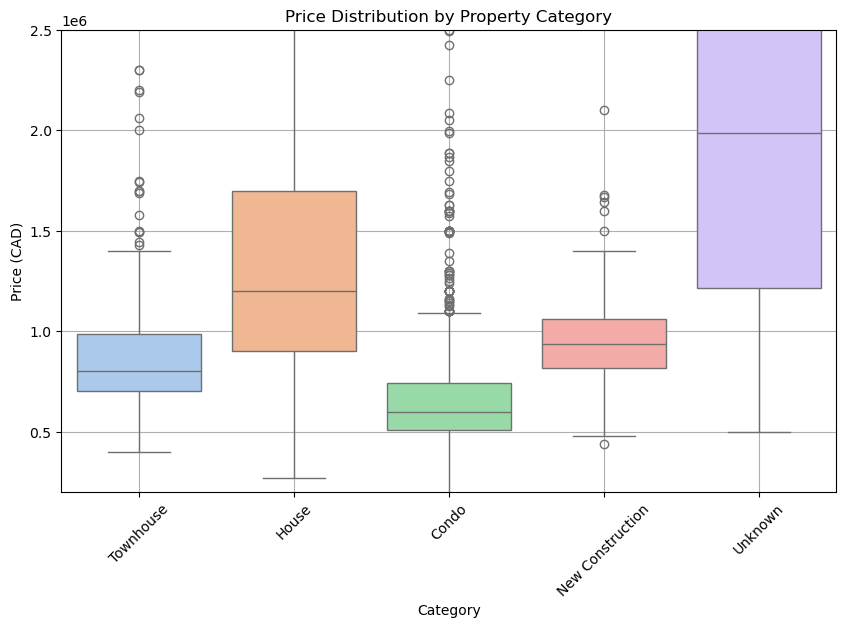

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='price', hue='category', palette='pastel', legend=False)
plt.title("Price Distribution by Property Category")
plt.xticks(rotation=45)
plt.ylabel("Price (CAD)")
plt.xlabel("Category")
plt.ylim(200000, 2500000)  # Optional: zoom in to ignore extreme outliers
plt.grid(True)
plt.show()

In [10]:
df['category'].value_counts(dropna=False)

category
House               2233
Condo               1015
Townhouse            508
New Construction     102
Unknown               46
Name: count, dtype: int64

In [11]:
df = df[df['category'] != 'Unknown']


## 🏙️ Price by City
Compare price ranges across different cities.

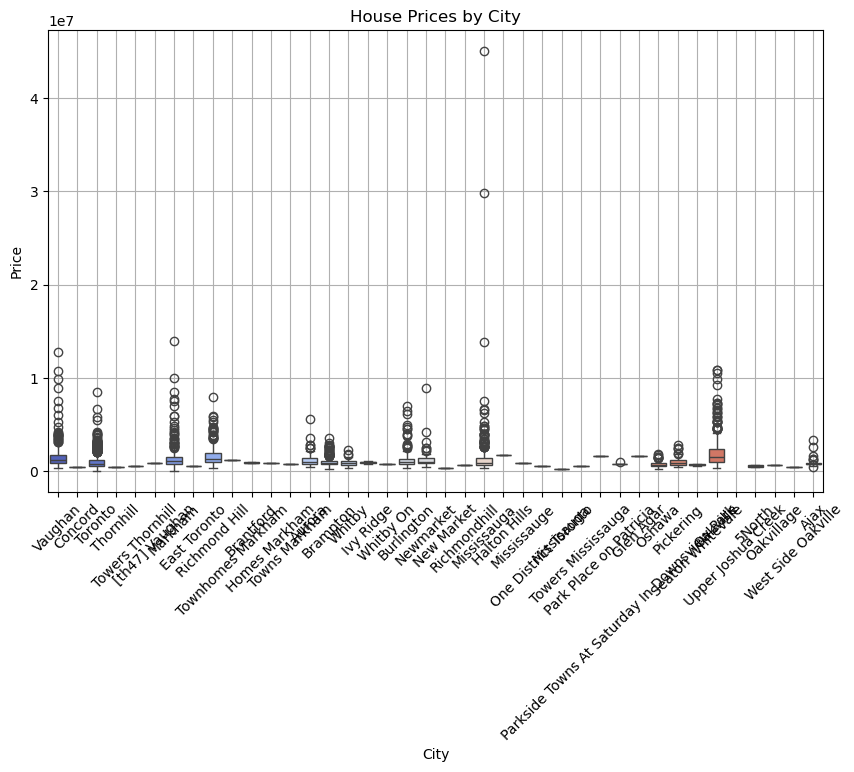

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='city', y='price', hue='city',palette='coolwarm')
plt.title('House Prices by City')
plt.ylabel('Price')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 🛏️ Bedrooms vs Price
Do more bedrooms mean higher price?

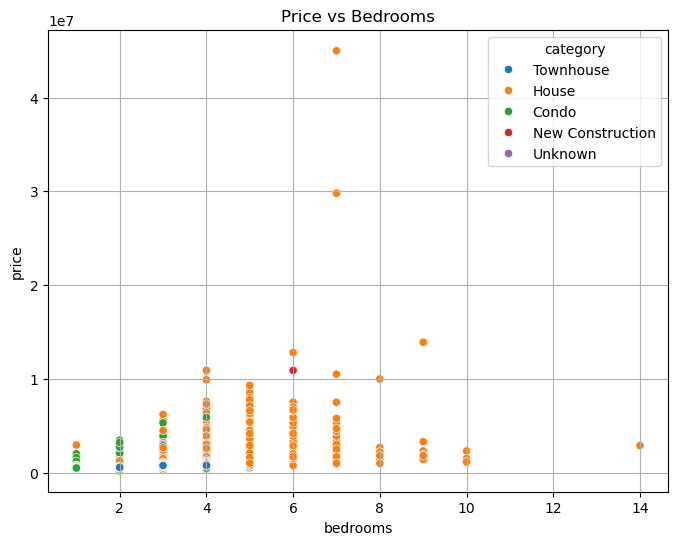

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bedrooms', y='price', hue='category', palette='tab10')
plt.title('Price vs Bedrooms')
plt.grid(True)
plt.show()

## 🔗 Correlation Heatmap
See how numerical features relate to each other.

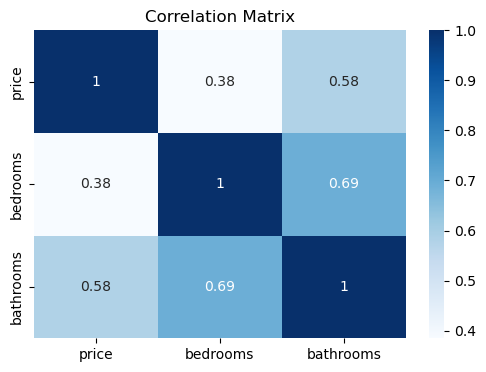

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price', 'bedrooms', 'bathrooms']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()